# Classifying Survival of the Titanic Disaster 

# Introduction: 
RMS Titanic was a British passenger ship which sank in the North Atlantic Ocean on April 15th,  1912 after striking an iceberg during its maiden voyage from Southampton, UK, to New York City, United States. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it the deadliest sinking of a single ship up to that time. This data set includes 891 observations of passengers aboard the ship. The data set includes information about passengers such as their age, sex, ticket type, fare, and whether or not they survived the sinking. We will be using the variables Age (double), Fare(double), and Sex(factor) to classify which passengers as having survived or not on during the sinking of the Titanic. 


# Preliminary exploratory data analysis:

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
set.seed(2022)
titanic_data <- read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv") |> #read data set
select("Survived", "Age", "Fare", "Sex", "Pclass") |> #filter for relevant variables
filter(!is.na(Age)) |> #remove observations with unknown Age
mutate(Survived = as.factor(Survived)) |> # 1 represents survived and 0 represents died
mutate(Sex = as.factor(Sex))


titanic_data

titanic_split <- initial_split(titanic_data, prop = 0.75, strata = Survived) #split into 75% training, 25% testing
titanic_train <- training(titanic_split)
titanic_test <- testing(titanic_split)

Rows: 891 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Name, Sex, Ticket, Cabin, Embarked
dbl (7): PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Survived,Age,Fare,Sex,Pclass
<fct>,<dbl>,<dbl>,<fct>,<dbl>
0,22,7.2500,male,3
1,38,71.2833,female,1
1,26,7.9250,female,3
1,35,53.1000,female,1
0,35,8.0500,male,3
0,54,51.8625,male,1
0,2,21.0750,male,3
1,27,11.1333,female,3
1,14,30.0708,female,2


In [3]:
num_obs <- nrow(titanic_train)
titanic_train |>
mutate(is_male = as.integer(Sex != 'female')) |> #convert to binary 1 = Male , 0 = Female
group_by(Survived) |> 
summarize(count = n(), percentage = n() / num_obs * 100,
          avg_age = mean(Age),
          avg_fare = mean(Fare),
          avg_sex = mean(is_male),
          avg_class = mean(Pclass))

Survived,count,percentage,avg_age,avg_fare,avg_sex,avg_class
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,318,59.43925,29.87107,23.29064,0.8396226,2.503145
1,217,40.56075,27.86599,52.18232,0.3271889,1.894009


### Analysis
Here we see a strong difference in fare price and sex between those who survived and those who didn't. Those who survived on average paid $30 more than those who did not and were more likely to be female rather than male. Their seemed to be less of a difference between ages of those who survived and those who did not but still the ones who survived were on average younger.

In [4]:
sum(is.na(titanic_train)) #number of observations that had NA values

[1] 0

### Preliminary Visualizations:

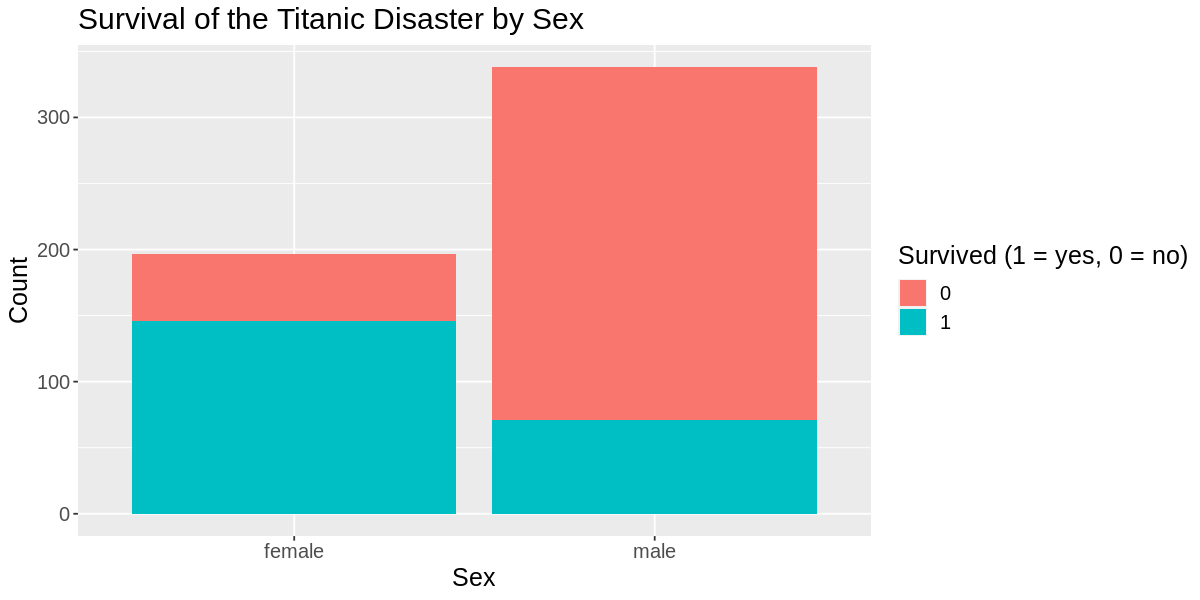

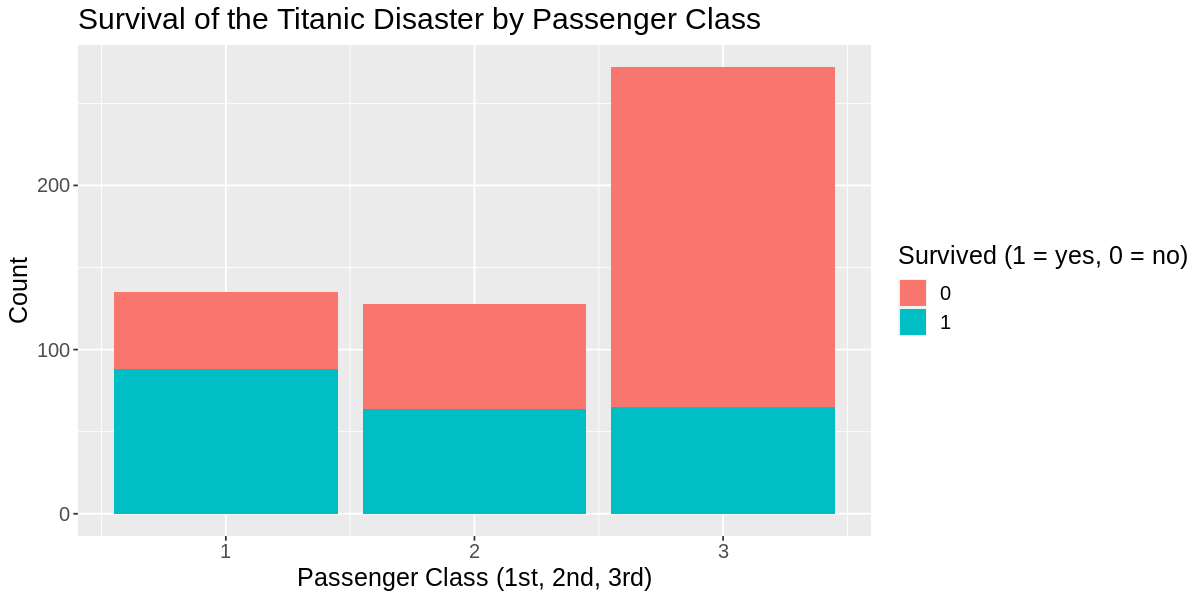

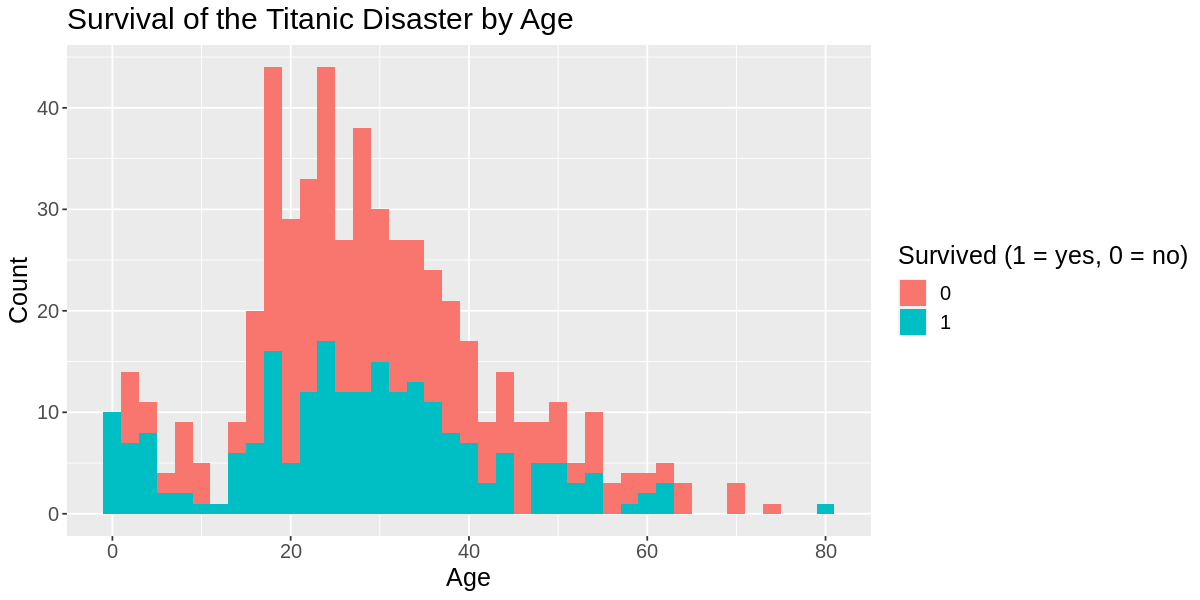

In [5]:
options(repr.plot.width=10, repr.plot.height=5)

# training_plot <- ggplot(titanic_train, aes(x=Age, y=Fare))+
# geom_point(aes(color = Survived, shape = Sex), alpha=0.8) +
# labs(x = "Age" , y = "Fare ($)", color = "Survived (1 = yes, 0 = no)", shape = "Sex") +
# ggtitle("Survival of the Titanic Disaster") +
# theme(text = element_text(size = 15))

# training_plot

survived_by_sex_plot <- ggplot(titanic_train, aes(x = Sex))+
geom_bar(aes(fill = Survived)) +
labs(x = "Sex" , y = "Count", fill = "Survived (1 = yes, 0 = no)") +
ggtitle("Survival of the Titanic Disaster by Sex") +
theme(text = element_text(size = 15))

survived_by_sex_plot

survived_by_pclass_plot <- ggplot(titanic_train, aes(x = Pclass))+
geom_bar(aes(fill = Survived)) +
labs(x = "Passenger Class (1st, 2nd, 3rd)" , y = "Count", fill = "Survived (1 = yes, 0 = no)") +
ggtitle("Survival of the Titanic Disaster by Passenger Class") +
theme(text = element_text(size = 15))

survived_by_pclass_plot

survived_by_age_plot <- ggplot(titanic_train, aes(x = Age))+
geom_histogram(aes(fill = Survived), binwidth = 2) +
labs(x = "Age" , y = "Count", fill = "Survived (1 = yes, 0 = no)") +
ggtitle("Survival of the Titanic Disaster by Age") +
theme(text = element_text(size = 15))

survived_by_age_plot

Warning message:
“Removed 4 rows containing missing values (geom_bar).”


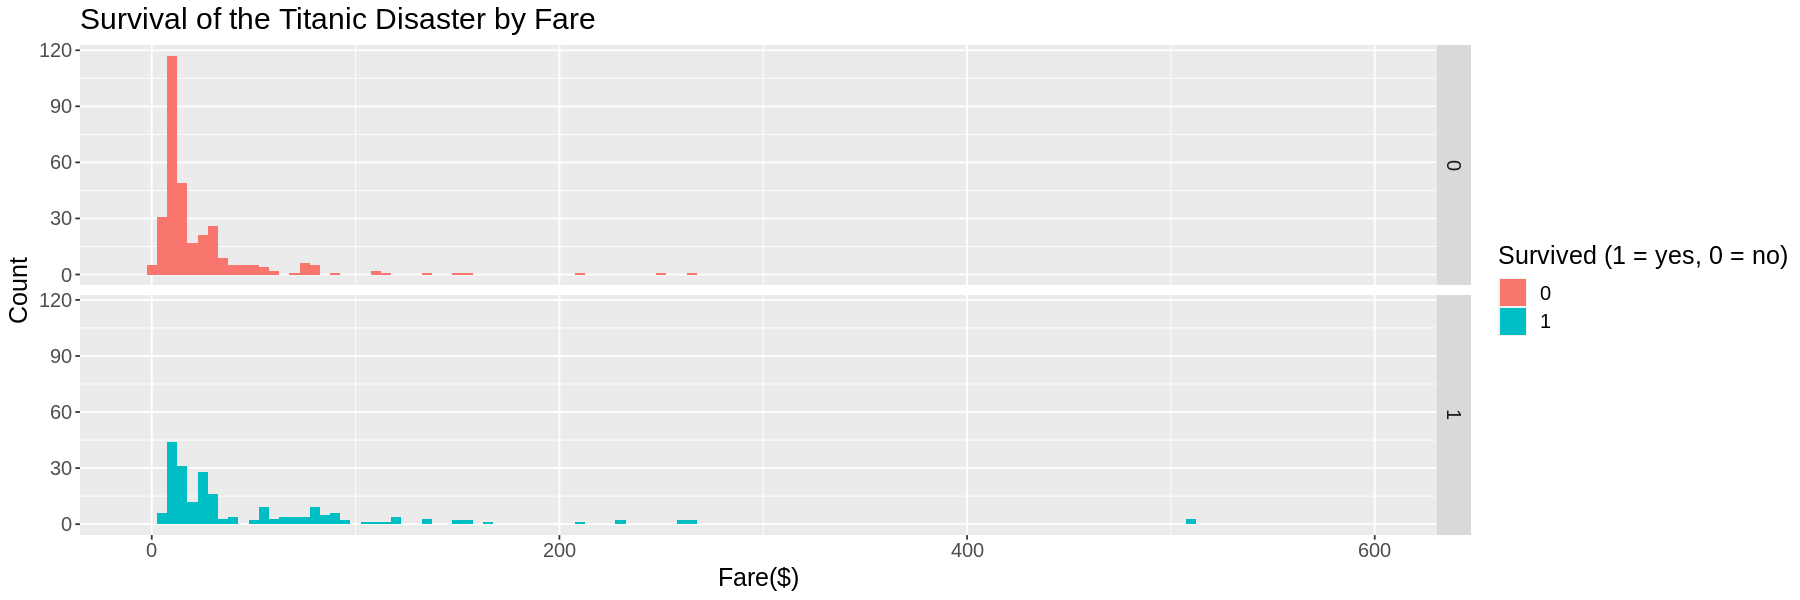

In [6]:
options(repr.plot.width=15, repr.plot.height=5)

survived_by_fare_plot <- ggplot(titanic_train, aes(x = Fare))+
geom_histogram(aes(fill = Survived), binwidth = 5) +
labs(x = "Fare($)" , y = "Count", fill = "Survived (1 = yes, 0 = no)") +
ggtitle("Survival of the Titanic Disaster by Fare") +
facet_grid(rows = "Survived")+
xlim(-5,600)+
theme(text = element_text(size = 15))

survived_by_fare_plot

# Methods:
After reading in the titanic data, we select only the useful information for our question. This includes the “Survived”, “Age”, “Fare”, and “Sex” columns. The “Survived” column contains values of either 0 or 1, with 1 indicating the survival of a person and 0 indicating that the person did not survive. The “Age” column contains double values denoting the age in years of each person. The “Fare” column contains double values denoting the fare price in dollars paid for the trip. Finally, the “Sex” column contains either “male” or “female”. 

We will be using a scatter plot to represent our data. The x-axis will represent age, the y-axis will represent fare price, the shape of the points will represent sex (circle = female, triangle = male), and the color will represent survival (orange = did not survive, blue = survived).


# Expected outcomes and significance:
We expect to find that, since women and children were given priority access to lifeboats, the survival rates of people under 12 years old as well as the survival rates of women should be higher than adult males. Additionally, wealthier passengers are expected to have a higher rate of survival due to the infrastructure of the ship; first-class cabins were closest to the lifeboats, therefore they were first in line to board lifeboats.

These findings could lead us to understand the type of person that had priority in escaping on a lifeboat. Additionally, it could support our theory that social priorities in the early 1900s leaned towards the health of young people, women, and wealthy people.

We only had access to 891 data points so many of the people who were on the boat were not classified as having survived or not. Essentially, these people were missing. Using our model we could potentially predict whether or not these people survived or died if we had access to their sex, age, and ticket fare price.

In [7]:
titanic_train <- select(titanic_train, "Survived", "Sex", "Pclass") |>
mutate(is_male = as.integer(Sex != 'female'))
titanic_test <- select(titanic_test, "Survived", "Sex", "Pclass") |>
mutate(is_male = as.integer(Sex != 'female'))

glimpse(titanic_train)
glimpse(titanic_test)

Rows: 535
Columns: 4
$ Survived <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Sex      <fct> male, male, male, male, male, female, male, male, female, mal…
$ Pclass   <dbl> 3, 1, 3, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 3, 3, 2, 3, 1, 3, 3, 3…
$ is_male  <int> 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1…
Rows: 179
Columns: 4
$ Survived <fct> 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0…
$ Sex      <fct> female, male, female, female, female, male, male, male, male,…
$ Pclass   <dbl> 3, 3, 3, 1, 3, 1, 2, 3, 3, 1, 2, 1, 1, 2, 3, 1, 3, 2, 3, 3, 1…
$ is_male  <int> 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1…


In [17]:
titanic_recipe <- recipe(Survived ~ is_male + Pclass, data = titanic_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", 
neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

titanic_vfold <- vfold_cv(titanic_train, v = 5, strata = Survived)

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 2))

knn_results <- workflow() |>
  add_recipe(titanic_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = titanic_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies |> arrange(desc(mean))

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,accuracy,binary,0.7868666,5,0.01388270,Preprocessor1_Model06
13,accuracy,binary,0.7868666,5,0.01388270,Preprocessor1_Model07
15,accuracy,binary,0.7868666,5,0.01388270,Preprocessor1_Model08
17,accuracy,binary,0.7868666,5,0.01388270,Preprocessor1_Model09
19,accuracy,binary,0.7868666,5,0.01388270,Preprocessor1_Model10
21,accuracy,binary,0.7868666,5,0.01388270,Preprocessor1_Model11
23,accuracy,binary,0.7868666,5,0.01388270,Preprocessor1_Model12
25,accuracy,binary,0.7868666,5,0.01388270,Preprocessor1_Model13
27,accuracy,binary,0.7868666,5,0.01388270,Preprocessor1_Model14


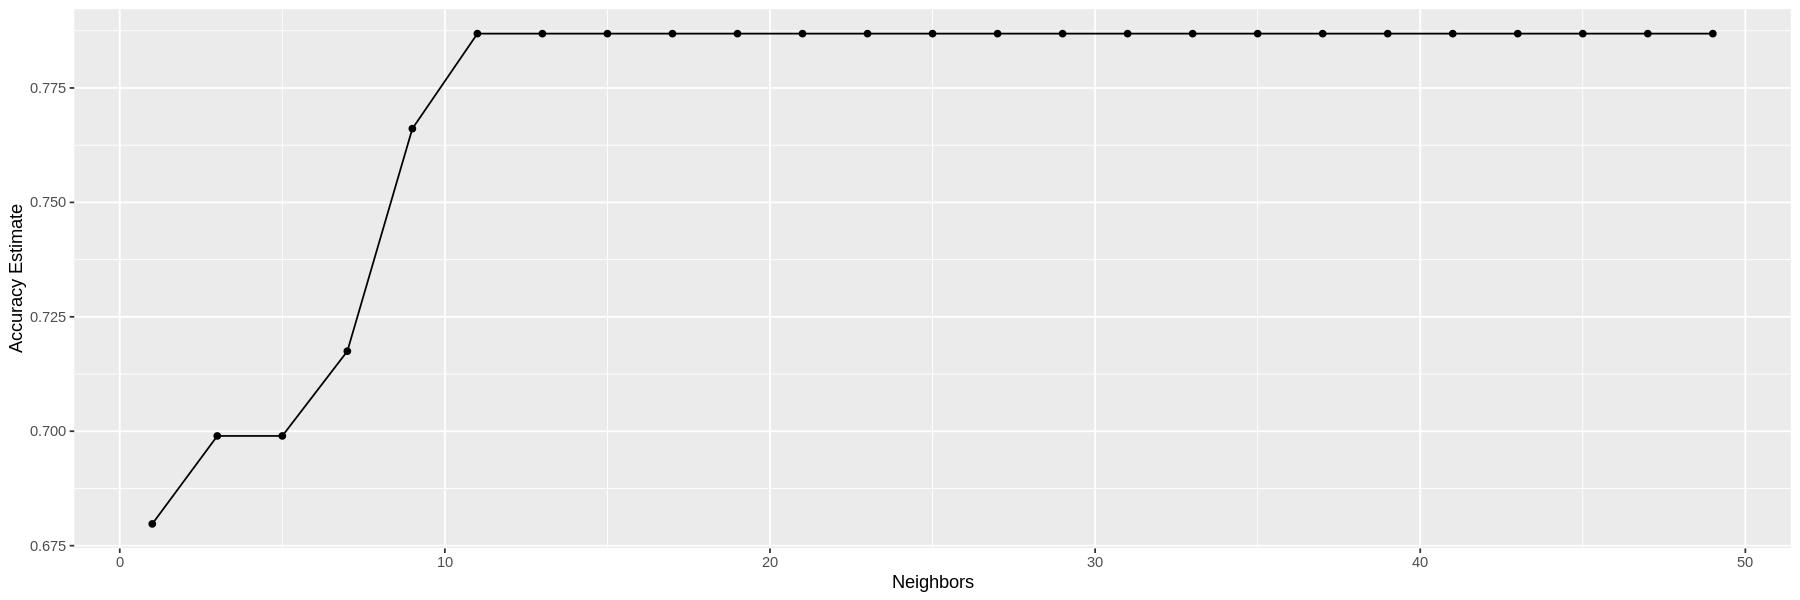

In [18]:
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate")

accuracy_versus_k

In [20]:
knn_best_k_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) |>
      set_engine("kknn") |>
      set_mode("classification")

titanic_fit <- workflow() |>
      add_recipe(titanic_recipe) |>
      add_model(knn_best_k_spec) |>
      fit(data = titanic_train)

titanic_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(11,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2130841
Best kernel: rectangular
Best k: 11

In [22]:
options(repr.matrix.max.rows = 6)
titanic_test_predictions <- predict(titanic_fit , titanic_test) |>
      bind_cols(titanic_test)
titanic_test_predictions

.pred_class,Survived,Sex,Pclass,is_male
<fct>,<fct>,<fct>,<dbl>,<int>
0,1,female,3,0
0,0,male,3,1
0,1,female,3,0
⋮,⋮,⋮,⋮,⋮
0,1,female,3,0
1,1,female,1,0
0,0,male,3,1


In [23]:
titanic_prediction_accuracy <- titanic_test_predictions |>
        metrics(truth = Survived, estimate = .pred_class)     
titanic_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8044693
kap,binary,0.5684965


In [24]:
titanic_mat <- titanic_test_predictions |> 
      conf_mat(truth = Survived, estimate = .pred_class)
titanic_mat

          Truth
Prediction   0   1
         0 103  32
         1   3  41

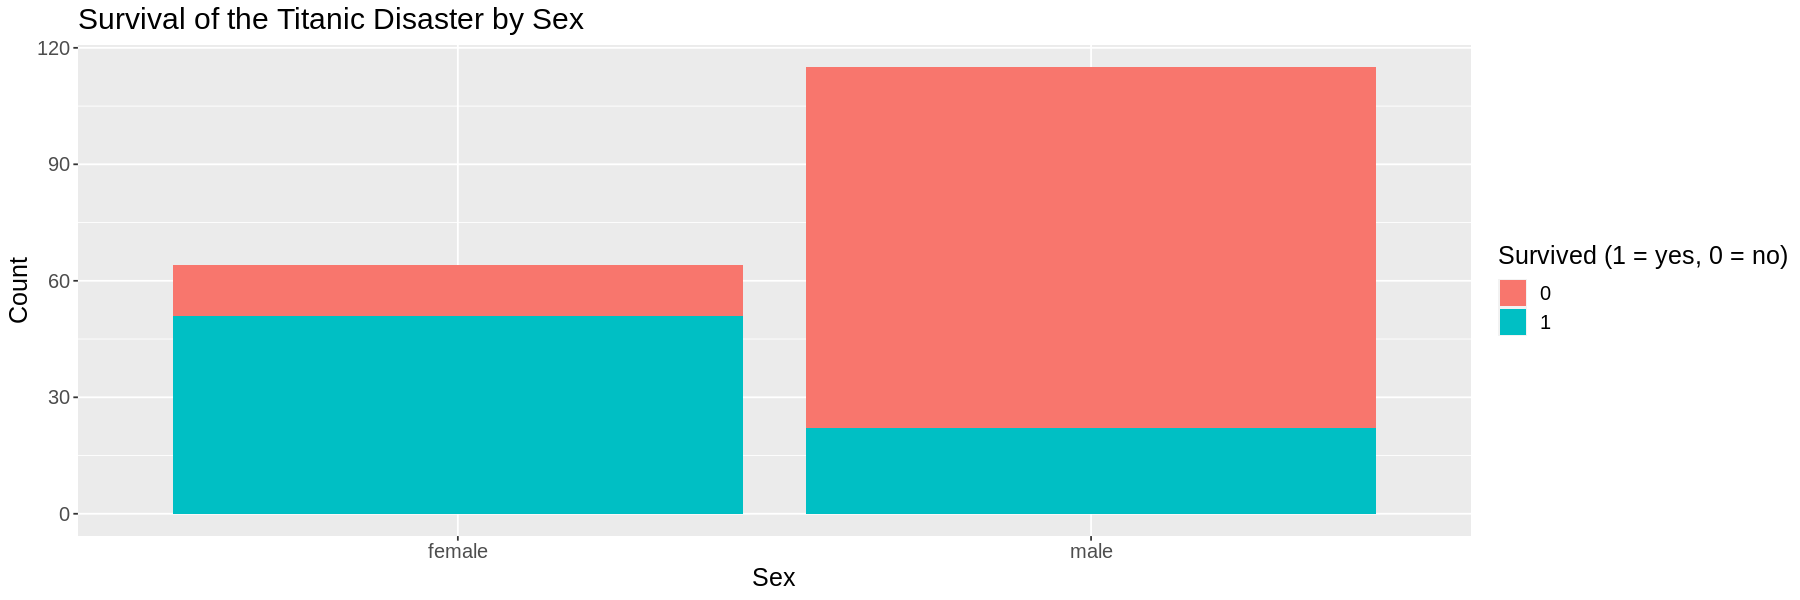

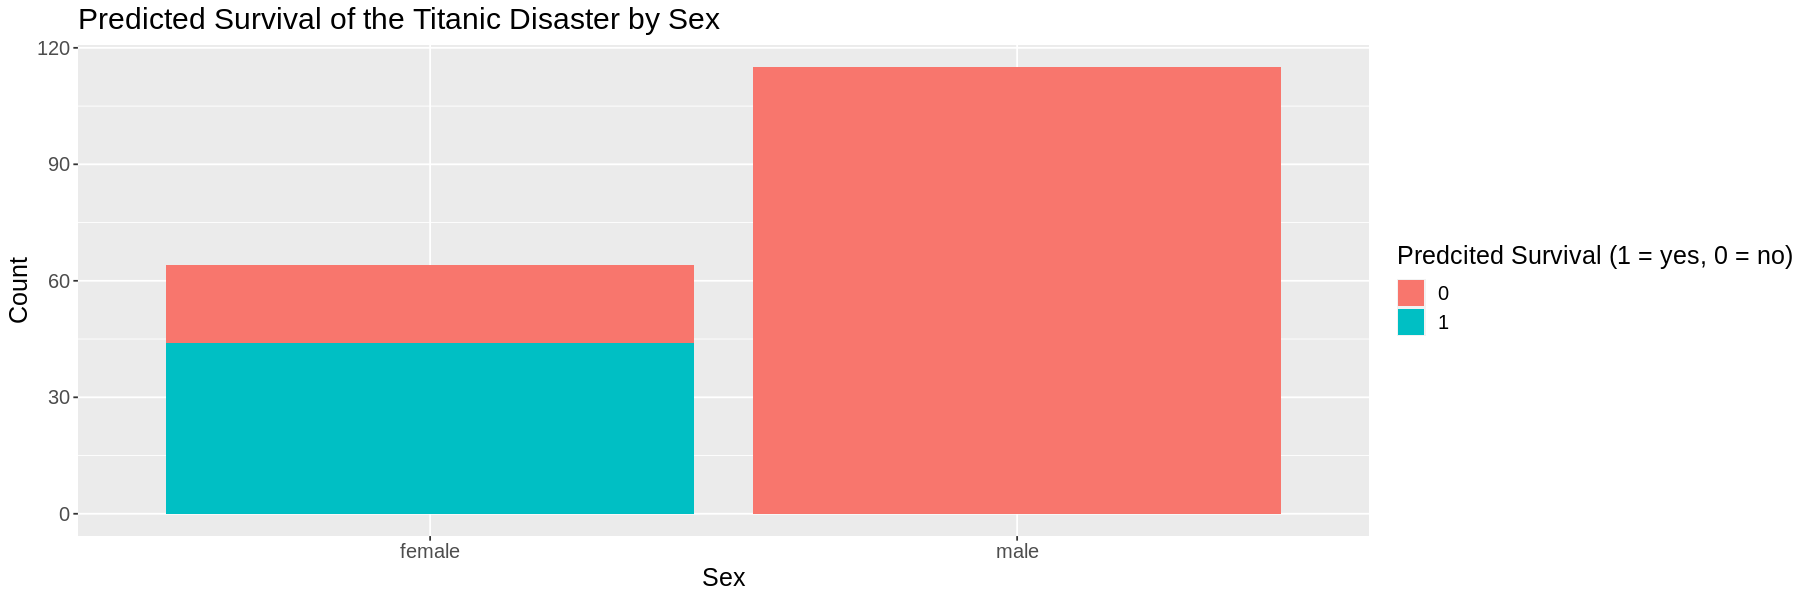

In [29]:
survived_by_sex_plot_test <- ggplot(titanic_test, aes(x = Sex))+
geom_bar(aes(fill = Survived)) +
labs(x = "Sex" , y = "Count", fill = "Survived (1 = yes, 0 = no)") +
ggtitle("Survival of the Titanic Disaster by Sex") +
theme(text = element_text(size = 15))

survived_by_sex_plot_test

pred_survived_by_sex_plot_test <- ggplot(titanic_test_predictions, aes(x = Sex))+
geom_bar(aes(fill = .pred_class)) +
labs(x = "Sex" , y = "Count", fill = "Predcited Survival (1 = yes, 0 = no)") +
ggtitle("Predicted Survival of the Titanic Disaster by Sex") +
theme(text = element_text(size = 15))

pred_survived_by_sex_plot_test

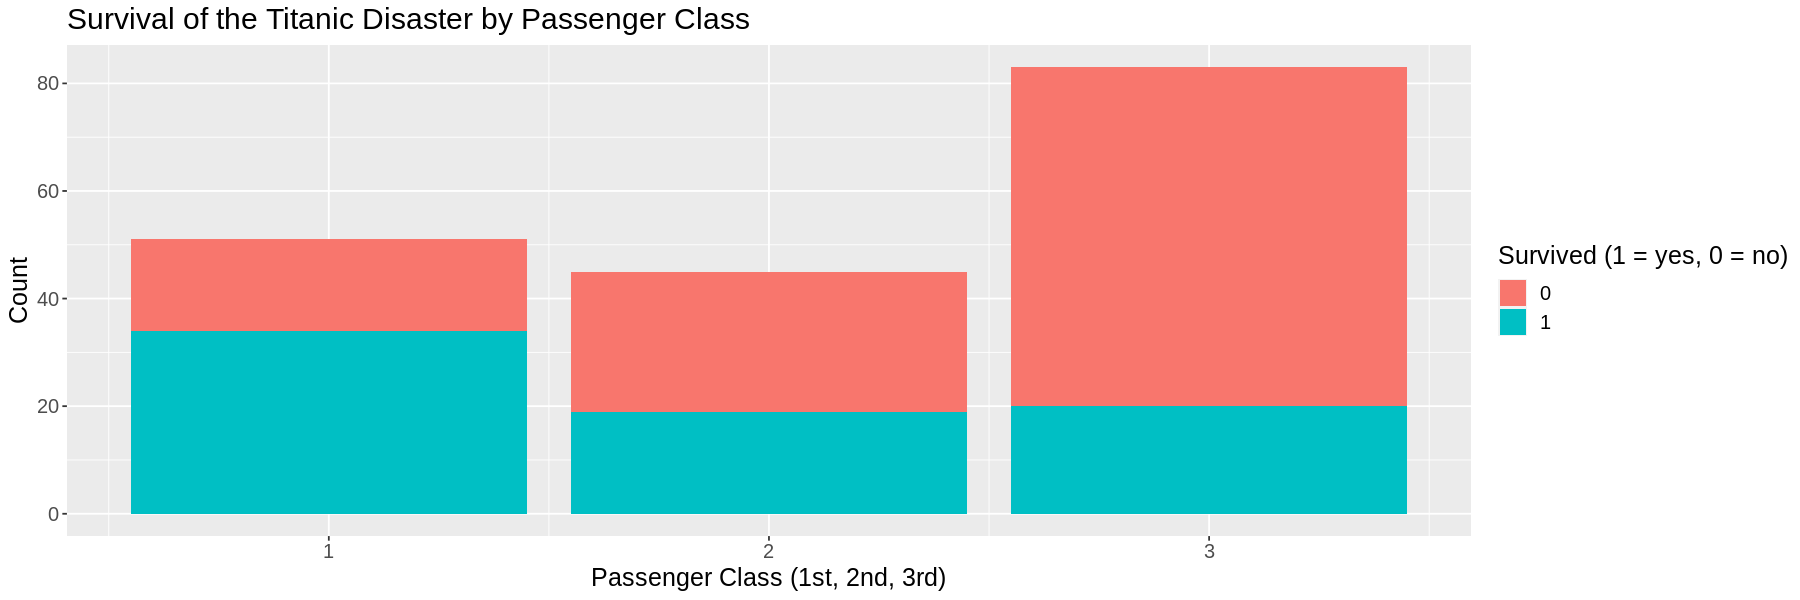

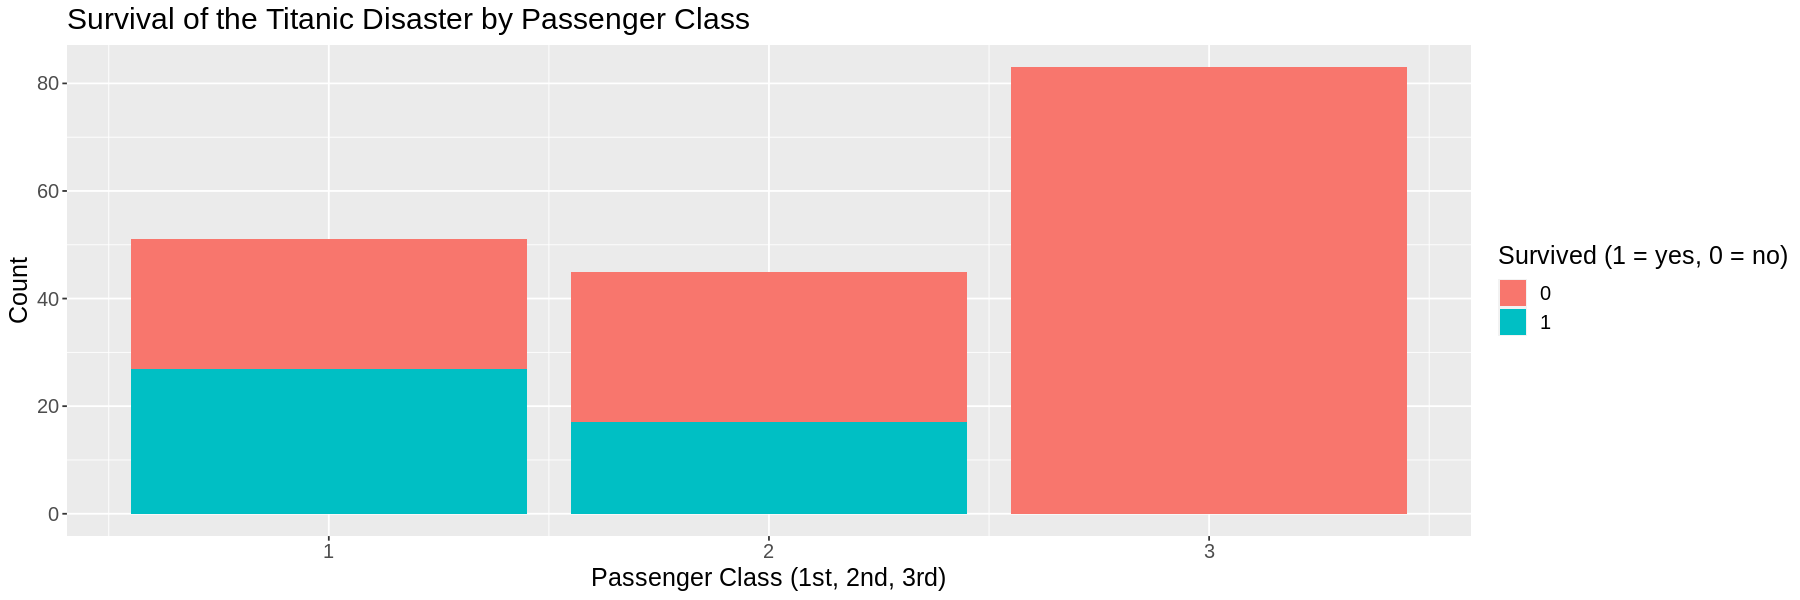

In [31]:
survived_by_pclass_plot_test <- ggplot(titanic_test, aes(x = Pclass))+
geom_bar(aes(fill = Survived)) +
labs(x = "Passenger Class (1st, 2nd, 3rd)" , y = "Count", fill = "Survived (1 = yes, 0 = no)") +
ggtitle("Survival of the Titanic Disaster by Passenger Class") +
theme(text = element_text(size = 15))

survived_by_pclass_plot_test

pred_survived_by_pclass_plot <- ggplot(titanic_test_predictions, aes(x = Pclass))+
geom_bar(aes(fill = .pred_class)) +
labs(x = "Passenger Class (1st, 2nd, 3rd)" , y = "Count", fill = "Survived (1 = yes, 0 = no)") +
ggtitle("Survival of the Titanic Disaster by Passenger Class") +
theme(text = element_text(size = 15))

pred_survived_by_pclass_plot

In [32]:
new_obs <- tibble(is_male = 1, Pclass = 1)
class_prediction <- predict(titanic_fit, new_obs)
class_prediction

.pred_class
<fct>
0
